In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-family: 'Consolas';
font-size: 12px;
</style>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model


In [3]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape)
y_train, y_test = y_train.flatten(), y_test.flatten()
print(y_train.shape)

170508288/170498071 [==============================] - 337s 2us/step
(50000, 32, 32, 3) (50000, 1)
(50000,)


In [6]:
K = len(set(y_train.flatten()))
print(K)


10


In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)


In [8]:
model = Model(i,x)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 24s 3ms/step - loss: 1.5874 - accuracy: 0.4161 - val_loss: 1.3436 - val_accuracy: 0.5006
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3048 - accuracy: 0.5280 - val_loss: 1.1691 - val_accuracy: 0.5778
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1738 - accuracy: 0.5763 - val_loss: 1.0551 - val_accuracy: 0.6227
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0868 - accuracy: 0.6103 - val_loss: 1.0177 - val_accuracy: 0.6365
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0128 - accuracy: 0.6402 - val_loss: 0.9927 - val_accuracy: 0.6463
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9500 - accuracy: 0.6611 - val_loss: 0.9290 - val_accuracy: 0.6723
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9017 - accuracy: 0.6808 - val_loss: 0.9086 - val_accuracy

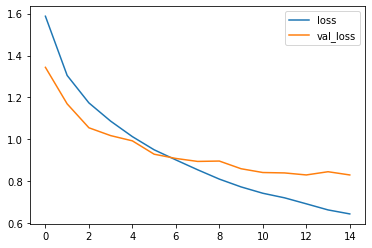

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

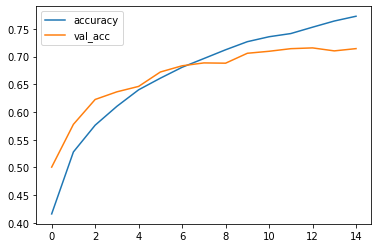

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()